<a href="https://colab.research.google.com/github/Meghashyamt/python/blob/master/Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# LINEAR REGRESSION

#import libraries 
import pandas as pd
import numpy as np


# import libraries for data visualisation
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# import machine learning
from sklearn.linear_model import LinearRegression

# training and testing model
from sklearn.model_selection import train_test_split

#Model Evaluation
from sklearn.metrics import r2_score
from sklearn import metrics
from scipy import stats


In [0]:
# importing data
cars = pd.read_csv("cars.csv")

In [63]:
print(cars.shape)

(32, 12)


In [64]:
cars.head()

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [65]:
# Exploratory data Analysis
# Checking for null values
cars.isnull().sum()


car_model    0
mpg          0
cyl          0
disp         0
hp           0
drat         0
wt           0
qsec         0
vs           0
am           0
gear         0
carb         0
dtype: int64

In [0]:
# replacing with mean
#cars=cars.fillna(cars.mean())

In [0]:
#cars.isnull.sum()

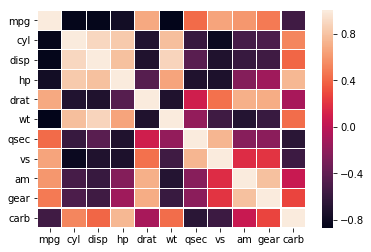

In [68]:
sb.heatmap(cars.corr(), linewidth=0.2)

In [69]:
cars.corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


Range of skewness, S<|1.96|
skewness of hp: 0.7614356361333623
skewness of wt: 0.44378553550607736
Kurtosis of hp: 0.05223272840399584
Kurtosis of wt: 0.1724705401587343


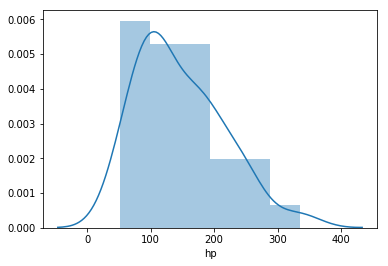

In [70]:
sb.distplot(cars.hp)
print("Range of skewness, S<|1.96|")

print("skewness of hp:",stats.skew(cars.hp))
print("skewness of wt:",stats.skew(cars.wt))

print("Kurtosis of hp:",stats.kurtosis(cars.hp))
print("Kurtosis of wt:",stats.kurtosis(cars.wt))
# both hp and wt passing normality test 

In [0]:
X= cars.loc[:,('hp','wt','am')]
y= cars.mpg

In [0]:
#for training and testing we split 
#by default test size it will take 70,30 percentage
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.15, random_state=14)

In [73]:
print("X_train shape",X_train.shape)
print("X_test shape",X_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

X_train shape (27, 3)
X_test shape (5, 3)
y_train shape (27,)
y_test shape (5,)


In [0]:
# For Linear Regression
model_lr=LinearRegression()

In [75]:
model_lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
#predicting value
y_predict= model_lr.predict(X_test)

In [77]:
#to find accuracy
r2_score(y_test,y_predict)

0.5740862487980454

In [78]:
y_test

2     22.8
29    19.7
27    30.4
19    33.9
3     21.4
Name: mpg, dtype: float64

In [79]:
y_predict

array([25.43866238, 21.26924914, 26.54561075, 27.62999392, 20.28878033])

In [0]:
predictions=model_lr.predict(X_test)

In [81]:
predictions

array([25.43866238, 21.26924914, 26.54561075, 27.62999392, 20.28878033])

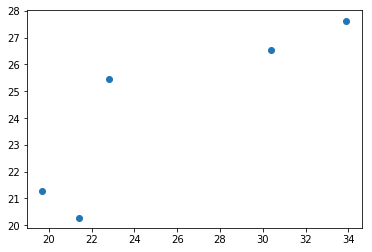

In [82]:
plt.scatter(y_test,predictions)

In [83]:
print("MAE", metrics.mean_absolute_error(y_test, predictions))
print("MSE", metrics.mean_squared_error(y_test, predictions))
print("MMSE", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE 3.0887053034675214
MSE 12.965836779590385
MMSE 3.6008105725781223


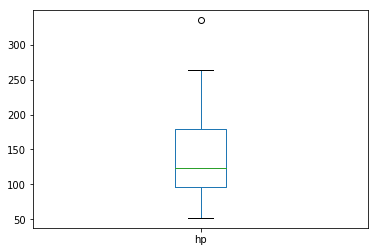

In [84]:
#Data Cleaning
cars.hp.plot(kind='box')

In [85]:
cars[cars.hp==cars.hp.max()]

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
30,Maserati Bora,15.0,8,301.0,335,3.54,3.57,14.6,0,1,5,8
